In [1]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *
from PIL import ImageFile

In [3]:
root='../../paintings/data/'
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files,           
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    get_y=parent_label,                             
    item_tfms=Resize(128))   
dataloader=dblock.dataloaders(root, bs=8)

In [4]:
dblock = dblock.new(item_tfms=Resize(224, ResizeMethod.Squish), batch_tfms=aug_transforms(do_flip=True,
                                                                                         flip_vert=True,
                                                                                          max_rotate=10,
                                                                                          max_lighting=0.1,
                                                                                         )) 
dls = dblock.dataloaders(root)

In [5]:
model = cnn_learner(dls, densenet201, metrics=[error_rate,accuracy])

/home/jadid/.local/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/home/jadid/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jadid/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
model.load('modelv2')

FileNotFoundError: [Errno 2] No such file or directory: 'models/modelv2.pth'

In [11]:
import gradio as gr
def recognize_image(image):
  pred, idx, probs = model.predict(image)
  return dict(zip(model.dls.vocab, map(float, probs)))

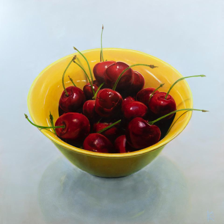

In [14]:
img = PILImage.create('test_img/still-life.jpeg')
img.thumbnail((224,224))
img

In [15]:
recognize_image(img)

{'Abstract': 8.749918379180599e-06,
 'Cubist': 9.974658496503253e-06,
 'Expressionist': 2.075462024464514e-09,
 'Impressionist': 6.171396194076806e-08,
 'Landscape': 1.3958008366898866e-06,
 'Pop Art': 1.497430048402748e-06,
 'Portrait': 2.9176533189456677e-08,
 'Realist': 0.0003043407923541963,
 'Still Life': 0.999639630317688,
 'Surrealist': 3.438818021095358e-05}

In [16]:
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = [
    'test_img/still-life.jpeg',
    'test_img/landscape.jpeg',
    'test_img/abstract2.jpg',
    ]

iface = gr.Interface(fn=recognize_image, inputs=image, outputs=label, examples=examples)
iface.launch(inline=False)

/tmp/ipykernel_14909/2300414932.py:1: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(192,192))
/tmp/ipykernel_14909/2300414932.py:1: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(192,192))
/tmp/ipykernel_14909/2300414932.py:2: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label()
/tmp/ipykernel_14909/2300414932.py:2: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "/home/jadid/.local/lib/python3.10/site-packages/gradio/routes.py", line 439, in run_predict
    output = await app.get_blocks().process_api(
  File "/home/jadid/.local/lib/python3.10/site-packages/gradio/blocks.py", line 1384, in process_api
    result = await self.call_function(
  File "/home/jadid/.local/lib/python3.10/site-packages/gradio/blocks.py", line 1089, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/home/jadid/.local/lib/python3.10/site-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/home/jadid/.local/lib/python3.10/site-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/home/jadid/.local/lib/python3.10/site-packages/anyio/_backends/_asyncio.py", line 807, in run
    result = context.run(func, *args)
  File "/home/jadid/.local/lib/python3.10/site-packages/gradio/utils.py", lin